In [25]:
from matplotlib.pyplot import imshow
from IPython.display import display
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageChops
import cv2
import numpy as np
import glob, os

In [26]:
ls ..

data/    LICENSE.txt*  README.md*  test.py*   zizi-data/
docker/  models/       scripts/    train.py*  zizi-scripts/
imgs/    options/      script.sh   util/


In [27]:

# src = Image.open('results/test_img/000050.png')
# src2 = src.resize((960,1080))
# display(src2)

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

def make_img(im):
    # CV make invert BW
    #     im = cv2.imread('../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png')
    #     print(im.shape)
    im = cv2.resize(im, (832, 832)) # 832
    #     print(im.shape)
    im = im/255.0
    im_power_law_transformation = cv2.pow(im,0.01)
    im_PIL = Image.fromarray((im_power_law_transformation * 255).astype(np.uint8))
    # display(Image.fromarray((im * 255).astype(np.uint8)))
    im_invert = ImageOps.invert(im_PIL).convert('L')

    # make sil

    blur1 = im_invert.filter(ImageFilter.GaussianBlur(radius=2))
    im_sil = add_margin(blur1, 0, 200, 45, 0, color='#FFFFFF')
    # display(im_sil)

    # makeshadow

    blur = im_invert.filter(ImageFilter.GaussianBlur(radius=65)) #25

    enhancer = ImageEnhance.Contrast(blur)
    im_shadow = enhancer.enhance(1)
    # birghtness? gray - feeling of transparency

    im_shadow = add_margin(im_shadow, 45, 0, 0, 200, color='#FFFFFF')
    final_img_comp = ImageChops.multiply(im_shadow, im_sil)
    #     print(final_img.size)
    # display(final_img_comp)



    # Make final

    final_img = final_img_comp.crop((0, 0, 832, 832)) 
    #     print(final_img.size)

    return  final_img
    # display(final_img)



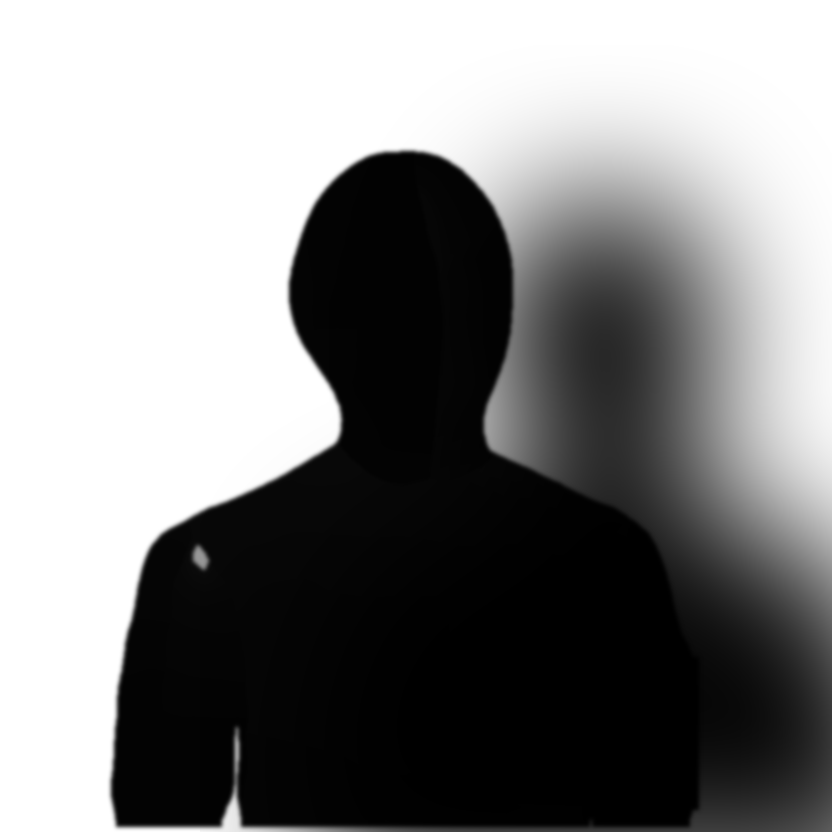

In [28]:
im = cv2.imread('../zizi-data/datasets/acts/close/test_densepose/fiveyears-ruby-close/005001_IUV.png')
display(make_img(im))


In [31]:
!mkdir ../zizi-data/datasets/acts/close/test_shadow/

mkdir: cannot create directory ‘../zizi-data/datasets/acts/close/test_shadow/’: File exists


In [29]:
# directory = "fiveyears-ruby-full"
# ../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png

for d in sorted(glob.glob("../zizi-data/datasets/acts/close/test_densepose/[hsa]*")):
    print(os.path.basename(d))
    directory = os.path.basename(d)
    
    sdir = "../zizi-data/datasets/acts/close/test_shadow/"+directory+"/"

    if not os.path.exists(sdir):
        os.mkdir(sdir)

    for file in sorted(glob.glob("../zizi-data/datasets/acts/close/test_densepose/"+directory+"/*.png")):
        name = os.path.basename(file).replace('_IUV.png','')
        print(file)

        im = cv2.imread(file)
        
        make_img(im).save(sdir+name+".png")

aintro-close
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000001_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000002_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000003_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000004_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000005_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000006_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000007_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000012_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000013_IUV.png

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000110_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000111_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000112_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000113_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000114_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000115_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000116_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000117_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000118_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000119_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000120_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000121_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000122_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000218_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000219_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000220_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000221_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000222_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000223_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000224_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000225_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000226_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000227_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000228_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000229_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000230_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000327_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000328_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000329_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000339_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000443_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000444_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000445_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000446_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000447_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000550_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000551_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000552_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000553_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000554_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000555_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000660_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000661_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000662_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000663_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000761_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000762_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000763_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000764_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000765_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000766_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000767_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000768_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000769_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000770_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000771_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000869_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000870_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000871_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000872_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000873_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000874_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000875_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000876_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000877_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000878_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000879_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000880_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000881_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/000977_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000978_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000979_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000980_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000981_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000982_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000983_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/000989_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001086_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001087_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001088_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001089_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001090_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001091_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001092_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001093_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001094_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001095_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001096_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001097_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001193_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001194_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001195_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001196_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001197_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001198_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001199_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001200_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001201_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001202_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001203_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001204_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001205_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001303_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001304_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001305_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001306_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001307_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001308_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001309_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001310_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001311_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001312_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001313_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001314_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001410_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001411_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001412_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001413_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001414_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001415_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001416_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001417_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001418_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001419_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001420_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001421_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001422_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001519_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001520_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001521_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001522_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001523_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001524_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001525_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001526_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001527_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001528_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001529_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001531_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001628_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001629_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001630_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001631_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001632_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001633_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001634_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001635_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001636_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001637_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001640_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001737_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001738_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001739_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001740_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001741_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001742_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001743_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001744_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001745_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001746_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001749_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001857_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/001953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001956_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001957_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001958_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001959_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001960_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001961_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001962_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001963_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001964_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/001965_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/002063_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002064_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002065_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002066_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002067_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002068_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002069_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002070_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002071_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002072_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002073_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002074_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002075_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/002171_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002172_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002173_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002174_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002175_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002176_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002177_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002178_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002179_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002180_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002181_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002182_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002183_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/002279_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002280_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002281_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002282_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002283_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002284_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002285_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002286_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002287_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002288_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002289_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002290_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002291_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/aintro-close/002388_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002389_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002390_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002391_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002392_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002393_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002394_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/aintro-close/002400_IUV.png
../zizi-data

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000064_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000065_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000066_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000067_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000068_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000069_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000070_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000071_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000072_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000073_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000074_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000075_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000076_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000172_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000173_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000174_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000175_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000176_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000177_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000178_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000179_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000180_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000181_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000182_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000183_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000184_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000279_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000280_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000281_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000282_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000283_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000284_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000285_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000286_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000287_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000288_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000289_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000290_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000291_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000387_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000388_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000389_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000390_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000391_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000392_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000393_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000394_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000399_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000494_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000495_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000496_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000497_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000498_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000499_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000503_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000504_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000505_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000506_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000602_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000603_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000604_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000605_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000606_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000607_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000608_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000609_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000610_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000611_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000612_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000613_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000614_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000709_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000710_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000711_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000712_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000713_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000714_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000715_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000716_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000717_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000718_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000719_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000720_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000721_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000817_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000818_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000819_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000820_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000821_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000822_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000823_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000824_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000825_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000826_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000827_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000828_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000829_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/000925_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000926_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000927_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000928_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000929_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000930_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000931_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000932_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000933_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000934_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000935_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000936_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/000937_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001033_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001034_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001035_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001036_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001037_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001038_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001044_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001149_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001150_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001151_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001249_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001250_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001251_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001252_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001253_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001254_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001255_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001256_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001257_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001258_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001259_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001260_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001358_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001359_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001360_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001361_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001362_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001363_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001364_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001367_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001470_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001471_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001472_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001473_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001474_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001569_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001570_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001571_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001572_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001573_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001574_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001575_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001576_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001577_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001578_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001579_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001580_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001581_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001677_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001678_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001679_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001680_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001681_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001682_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001683_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001684_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001685_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001686_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001687_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001688_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001689_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001785_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001786_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001787_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001788_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001789_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001790_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001791_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001792_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001793_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001794_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001795_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001796_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001797_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/001893_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001894_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001895_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001896_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001897_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001898_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001899_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001900_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001901_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001902_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001903_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001904_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/001905_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002001_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002002_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002003_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002004_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002005_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002006_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002007_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002012_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002013_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002108_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002109_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002110_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002111_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002112_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002113_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002114_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002115_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002116_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002117_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002118_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002119_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002120_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002216_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002217_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002218_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002219_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002220_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002221_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002222_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002223_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002224_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002225_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002226_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002227_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002228_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002323_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002324_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002325_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002326_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002327_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002328_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002329_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002335_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002438_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002439_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002440_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002441_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002442_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002443_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002541_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002542_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002543_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002544_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002545_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002546_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002547_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002548_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002549_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002550_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002650_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002657_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002761_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002762_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002763_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002764_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002765_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002766_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002861_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002862_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002863_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002864_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002865_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002866_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002867_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002868_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002869_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002870_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002871_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002872_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002873_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/002969_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002970_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002971_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002972_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002973_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002974_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002975_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002976_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002977_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002978_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002979_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002980_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/002981_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003078_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003079_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003080_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003081_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003082_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003083_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003086_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003087_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003088_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003089_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003090_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003186_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003187_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003189_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003190_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003191_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003192_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003193_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003194_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003195_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003196_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003197_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003198_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003293_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003294_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003303_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003304_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003305_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003405_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003406_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003407_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003408_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003409_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003410_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003411_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003412_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003508_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003509_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003510_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003511_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003512_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003513_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003514_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003515_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003516_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003517_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003518_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003519_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003520_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003615_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003616_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003617_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003618_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003619_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003620_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003621_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003622_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003623_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003624_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003625_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003626_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003627_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003723_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003724_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003725_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003726_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003727_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003728_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003729_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003730_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003731_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003732_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003733_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003734_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003735_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003832_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003833_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003834_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003835_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003836_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003844_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/003941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/003953_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004058_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004059_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004060_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004061_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004158_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004159_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004160_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004161_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004162_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004163_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004164_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004165_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004166_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004167_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004168_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004169_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004170_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004267_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004268_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004269_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004270_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004271_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004272_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004273_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004274_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004275_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004276_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004277_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004278_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004279_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004375_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004376_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004377_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004378_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004379_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004380_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004381_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004382_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004383_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004384_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004385_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004386_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004387_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004484_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004485_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004486_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004487_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004488_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004489_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004490_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004491_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004492_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004493_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004494_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004495_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004496_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004591_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004592_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004593_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004594_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004595_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004596_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004597_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004598_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004599_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004600_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004601_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004602_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004603_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004700_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004701_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004702_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004703_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004704_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004705_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004706_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004707_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004708_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004709_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004710_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004711_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004712_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004807_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004808_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004809_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004810_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004811_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004812_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004813_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004814_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004815_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004816_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004817_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004818_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004819_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/004914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004915_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004916_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004917_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004918_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004919_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004920_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004921_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004922_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004923_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004924_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004925_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/004926_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005021_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005022_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005023_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005024_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005025_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005026_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005027_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005028_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005029_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005030_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005031_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005032_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005033_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005130_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005131_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005132_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005133_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005134_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005142_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005245_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005246_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005247_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005248_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005249_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005346_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005347_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005348_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005349_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005350_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005351_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005352_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005353_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005354_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005355_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005356_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005357_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005358_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005454_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005455_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005456_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005457_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005458_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005459_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005460_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005461_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005466_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005562_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005563_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005564_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005565_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005566_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005567_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005568_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005569_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005570_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005571_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005572_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005573_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005574_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005669_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005670_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005671_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005672_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005673_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005674_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005675_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005676_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005677_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005678_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005679_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005680_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005681_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005778_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005779_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005780_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005781_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005782_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005783_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005784_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005785_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005786_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005787_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005788_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005789_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005790_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005887_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005888_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005889_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005890_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005891_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005892_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005893_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005894_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005895_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005896_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005897_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005898_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005899_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/005994_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005995_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005996_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005997_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005998_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/005999_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006000_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006001_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006002_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006003_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006004_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006005_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006006_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006101_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006102_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006103_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006104_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006105_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006106_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006107_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006108_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006109_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006110_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006111_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006112_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006113_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006208_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006209_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006210_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006211_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006212_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006213_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006214_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006215_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006216_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006217_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006218_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006219_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006220_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006315_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006316_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006317_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006318_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006319_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006320_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006321_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006322_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006323_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006324_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006325_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006326_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006327_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006422_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006423_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006424_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006425_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006426_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006427_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006428_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006429_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006430_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006434_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006529_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006531_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006532_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006535_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006536_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006537_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006538_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006539_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006540_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006541_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006638_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006639_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006640_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006641_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006642_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006643_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006644_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006645_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006646_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006647_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006648_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006649_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006650_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006759_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006858_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006859_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006860_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006861_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006862_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006863_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006864_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006865_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006866_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006867_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006868_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/006965_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006966_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006967_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006968_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006969_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006970_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006971_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006972_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006973_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006974_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006975_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006976_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/006977_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007074_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007075_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007076_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007077_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007078_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007079_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007080_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007081_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007082_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007083_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007086_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007183_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007184_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007185_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007186_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007187_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007188_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007189_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007190_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007191_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007192_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007193_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007194_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007195_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007291_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007292_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007293_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007294_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007303_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007405_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007406_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007407_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007408_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007409_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007410_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007411_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007507_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007508_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007509_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007510_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007511_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007512_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007513_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007514_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007515_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007516_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007517_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007518_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007519_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007616_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007617_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007618_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007619_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007620_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007621_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007622_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007623_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007624_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007625_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007626_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007627_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007628_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007724_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007725_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007726_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007727_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007728_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007729_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007730_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007731_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007732_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007733_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007734_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007735_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007736_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007832_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007833_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007834_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007835_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007836_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007837_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007838_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007839_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007840_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007841_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007842_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007843_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007844_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/007941_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/007953_IUV.png

../zizi-data/datasets/acts/close/test_densepose/hosting-close/008050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008053_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008054_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008055_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008056_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008057_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008058_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008059_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008060_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008061_IUV.png
../zizi-data/datasets/acts/close/test_densepose/hosting-close/008062_IUV.png

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000074_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000075_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000076_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000077_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000078_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000079_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000080_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000081_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000082_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000083_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000171_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000172_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000173_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000174_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000175_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000176_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000177_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000178_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000179_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000180_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000181_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000268_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000269_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000270_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000271_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000272_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000273_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000274_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000275_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000276_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000277_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000278_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000367_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000368_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000369_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000370_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000371_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000372_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000373_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000374_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000375_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000376_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000470_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000471_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000472_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000559_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000560_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000561_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000562_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000563_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000564_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000565_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000566_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000567_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000568_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000569_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000660_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000661_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000662_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000663_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000664_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000665_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000666_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000758_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000759_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000760_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000761_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000762_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000856_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000857_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000858_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000953_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000954_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/000955_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001050_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001051_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001052_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001146_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001147_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001148_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001234_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001243_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001244_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001340_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001427_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001428_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001429_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001430_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001437_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001524_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001525_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001526_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001527_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001528_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001529_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001531_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001532_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001533_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001534_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001622_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001623_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001624_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001625_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001626_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001627_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001628_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001629_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001630_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001631_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001632_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001720_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001721_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001722_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001723_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001724_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001725_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001726_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001727_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001728_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001729_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001730_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001816_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001817_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001818_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001819_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001820_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001821_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001822_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001823_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001824_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001825_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001826_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001912_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001915_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001916_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001917_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001918_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001919_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001920_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001921_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/001922_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002012_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002013_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002014_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002015_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002016_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002017_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002018_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002105_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002106_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002107_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002108_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002109_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002110_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002111_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002112_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002113_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002114_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002115_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002202_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002203_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002204_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002205_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002206_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002207_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002208_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002209_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002210_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002211_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002212_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002303_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002304_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002305_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002306_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002307_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002308_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002394_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002395_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002396_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002397_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002398_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002399_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002400_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002401_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002402_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002403_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002404_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002492_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002493_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002494_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002495_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002496_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002497_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002498_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002499_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002500_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002501_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002502_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002589_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002590_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002591_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002592_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002593_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002594_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002595_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002596_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002597_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002598_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002599_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002687_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002688_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002689_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002690_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002691_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002692_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002693_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002694_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002695_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002696_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002697_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002785_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002786_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002787_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002788_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002789_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002790_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002791_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002792_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002793_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002794_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002795_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002882_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002883_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002884_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002885_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002886_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002887_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002888_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002889_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002890_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002891_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002892_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002979_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002980_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002981_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002982_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002983_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002984_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002985_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002986_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002987_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002988_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/002989_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003075_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003076_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003077_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003078_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003079_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003080_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003081_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003082_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003083_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003084_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003085_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003171_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003172_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003173_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003174_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003175_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003176_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003177_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003178_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003179_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003180_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003181_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003267_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003268_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003269_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003270_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003271_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003272_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003273_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003274_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003275_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003276_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003277_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003363_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003364_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003365_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003366_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003367_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003368_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003369_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003370_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003371_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003372_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003373_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003459_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003460_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003461_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003462_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003463_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003464_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003465_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003466_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003467_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003468_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003469_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003555_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003556_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003557_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003558_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003559_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003560_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003561_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003562_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003563_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003564_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003565_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003651_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003652_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003653_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003654_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003655_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003656_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003657_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003658_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003659_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003660_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003661_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003747_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003748_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003749_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003750_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003751_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003752_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003753_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003754_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003755_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003756_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003757_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003845_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003846_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003847_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003848_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003849_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003850_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003851_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003852_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003853_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003854_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003855_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003942_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003943_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003944_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003945_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003946_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003947_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003948_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003949_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003950_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003951_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/003952_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004039_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004040_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004041_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004042_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004043_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004044_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004045_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004046_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004047_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004048_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004049_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004135_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004136_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004137_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004138_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004139_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004140_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004141_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004142_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004143_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004144_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004145_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004232_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004233_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004234_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004235_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004236_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004237_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004238_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004239_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004240_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004241_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004242_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004329_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004330_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004331_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004332_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004333_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004334_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004335_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004336_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004337_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004338_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004339_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004426_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004427_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004428_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004429_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004430_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004431_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004432_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004433_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004434_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004435_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004436_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004522_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004523_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004524_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004525_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004526_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004527_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004528_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004529_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004530_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004531_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004532_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004619_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004620_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004621_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004622_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004623_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004624_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004625_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004626_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004627_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004628_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004629_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004715_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004716_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004717_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004718_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004719_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004720_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004721_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004722_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004723_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004724_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004725_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004811_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004812_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004813_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004814_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004815_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004816_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004817_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004818_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004819_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004820_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004821_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004907_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004908_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004909_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004910_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004911_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004912_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004913_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004914_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004915_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004916_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/004917_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005004_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005005_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005006_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005007_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005008_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005009_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005010_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005011_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005012_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005013_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005014_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005100_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005101_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005102_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005103_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005104_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005105_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005106_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005107_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005108_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005109_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005110_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005198_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005199_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005200_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005201_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005202_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005203_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005204_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005205_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005206_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005207_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005208_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd

../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005295_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005296_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005297_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005298_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005299_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005300_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005301_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005302_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005303_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005304_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetdreams-cara-close/005305_IUV.png
../zizi-data/datasets/acts/close/test_densepose/sweetd